<a href="https://colab.research.google.com/github/Nourankh20/Data-Visualization/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/Nourankh20/Data-Visualization/main/datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../datasets/{dataset_name}'


In [123]:
athlete_events_df =  pd.read_csv(get_path('athlete_events.csv'))

In [124]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [125]:
noc_regions = pd.read_csv(get_path('noc_regions.csv'))

In [126]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [127]:
df = pd.merge(athlete_events_df,noc_regions,left_on='NOC',right_on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


#Exploring the data


*   determine null values percentage among attrebutes using:
  *   .isna() function to detect missing values
  *   .sum() function to find total number of missing values
  *   .len() function to find total number of attrebutes
*   visualize gender distribution using: 
  *   area graphs 
  *   scatter plot
  *   pie chart
*   determine participants' height variation among females and males over the years using:
  *   boxplot
*   determine participants' Weight variation among females and males over the years using:
  *   boxplot


In [128]:
null_values_percentages = df.isna().sum()/len(df) *100
null_values_percentages

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494517
Height    22.189927
Weight    23.187833
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.310618
region     0.007756
notes     98.138990
dtype: float64

In [129]:
import seaborn as sns

KeyboardInterrupt: ignored

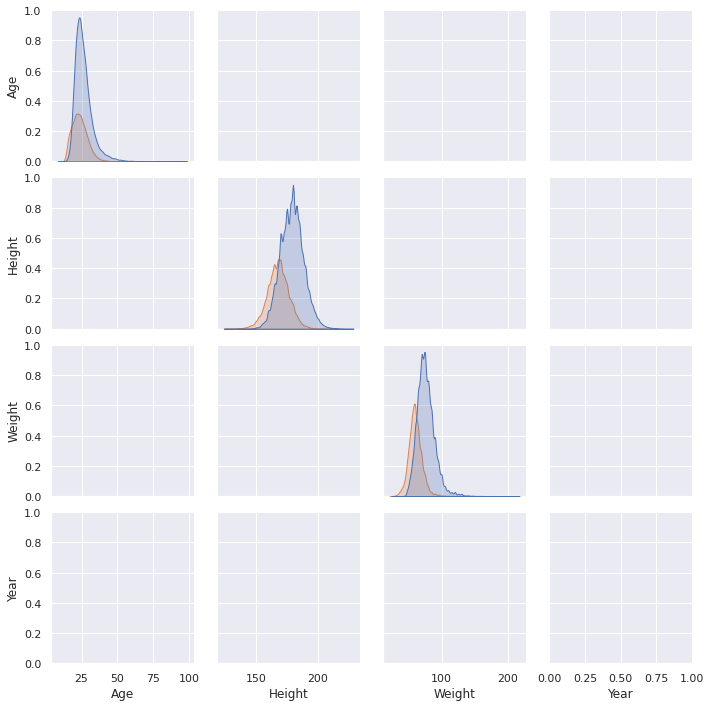

In [130]:
no_id = df.drop(columns=['ID'])
sns.pairplot(no_id, hue="Sex")

In [ ]:
gender_counts = df.Sex.value_counts()
gender_counts

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct="%0.2f%%", startangle=180);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Height over time')

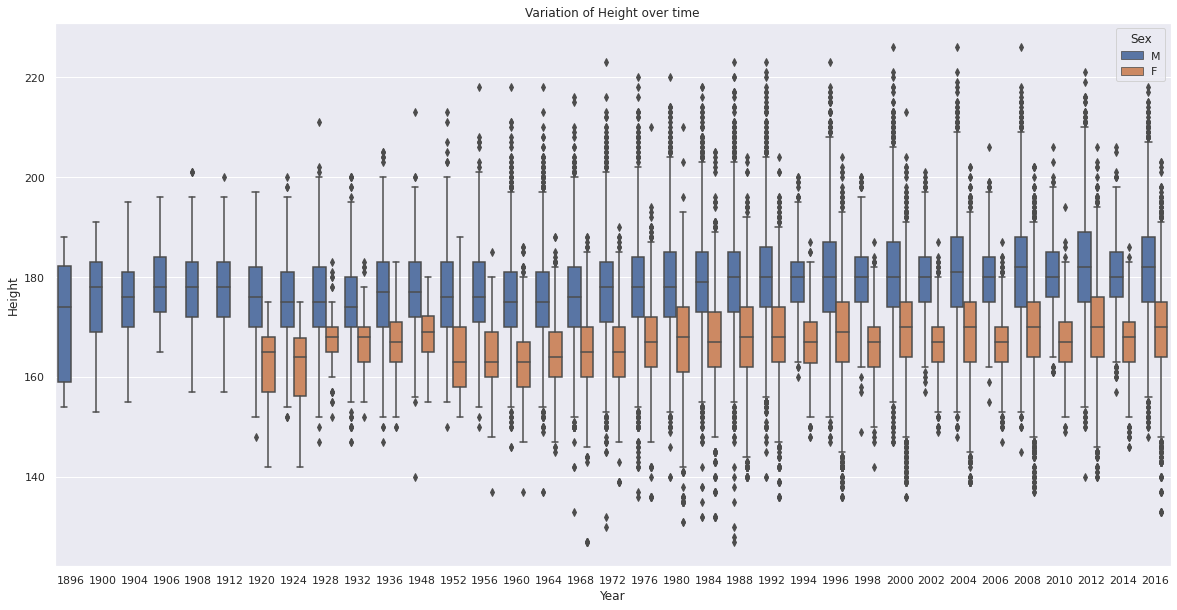

In [131]:
#Variation of Height over time
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Height', data=df , hue='Sex')
plt.title('Variation of Height over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Weight over time')

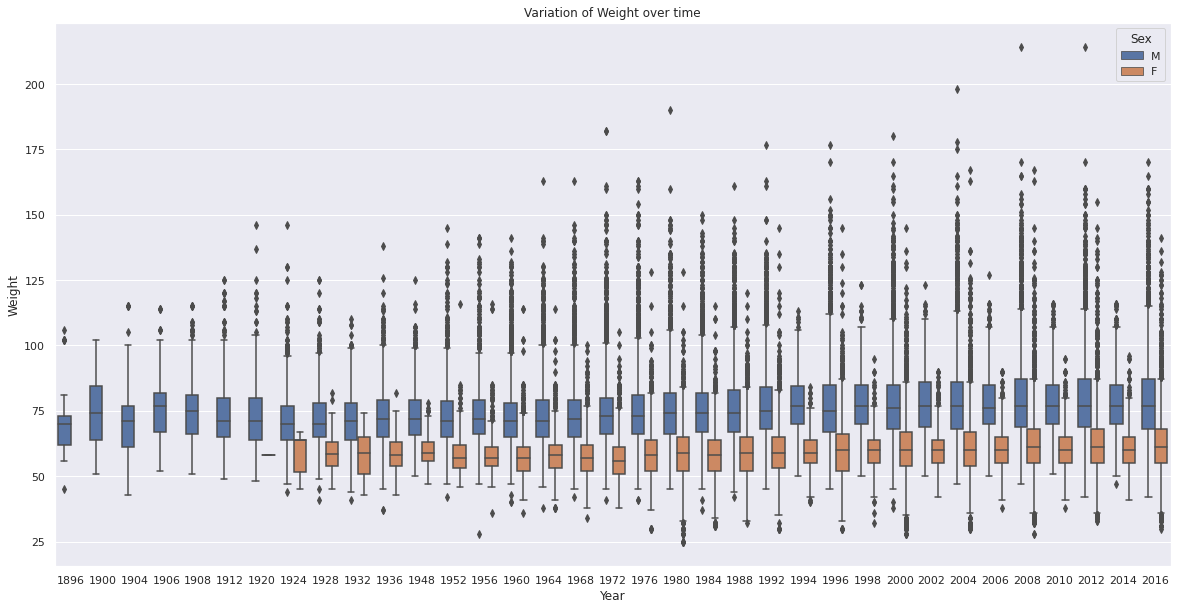

In [132]:
#Variation of Weight over time
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Weight', data=df , hue='Sex')
plt.title('Variation of Weight over time')

#Dealing with outliers


* drop null values in females and males height using: 
    * boxplot
* remove outliers from females and males height
* determine null values percentage among heights
      after outliers removal which have been reduced to 0.992370 % in females
      after outliers removal which have been reduced to 1.530413 % in males

* drop null values in females and males weight using: 
    * boxplot
* remove outliers from females and males weight
* determine null values percentage among weights
      after outliers removal which have been reduced to 1.082585 % in females
      after outliers removal which have been reduced to 1.773584 % in males



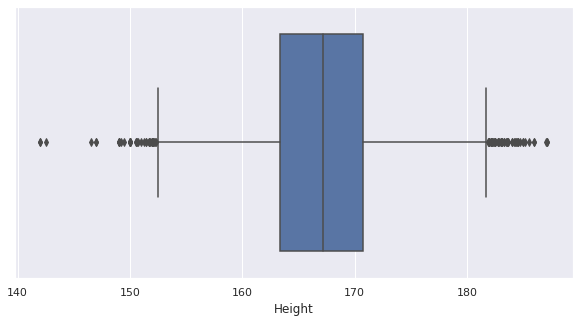

In [133]:
import seaborn as sns

Females= df[df['Sex']=='F']
Males=df[df['Sex']=='M']


sports_height_females = Females.groupby(['Sport','region'])['Height'].mean()
sports_height_males = Males.groupby(['Sport','region'])['Height'].mean()


dropped_null_values_height_females = sports_height_females.dropna(how='all')
dropped_null_values_height_females.values

dropped_null_values_height_males = sports_height_males.dropna(how='all')
dropped_null_values_height_males

ay = sns.boxplot(x=dropped_null_values_height_females)

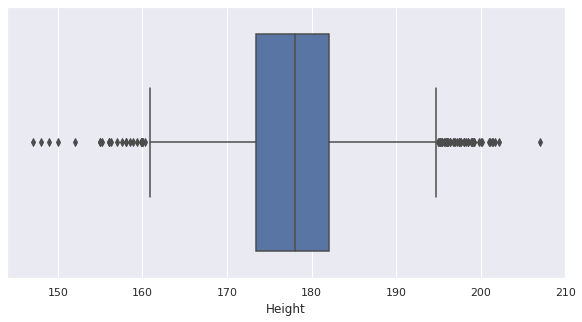

In [134]:
ay = sns.boxplot(x=dropped_null_values_height_males)

In [135]:
#Removed outliers in female height

Q1 = np.percentile(dropped_null_values_height_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1


Females = Females[~(Females['Height'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Height'] <= (Q1-1.5*IQR))]




#Removed outliers in male height

Q1 = np.percentile(dropped_null_values_height_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Height'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Height'] <= (Q1-1.5*IQR))]

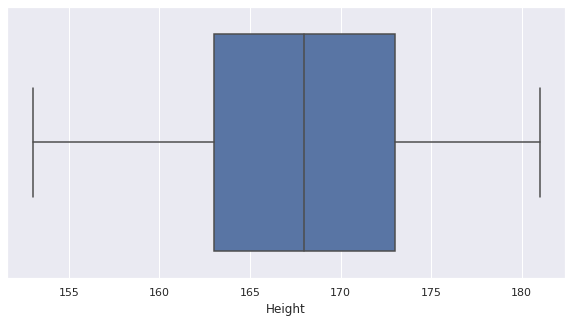

In [136]:
ax = sns.boxplot(x=Females['Height'])

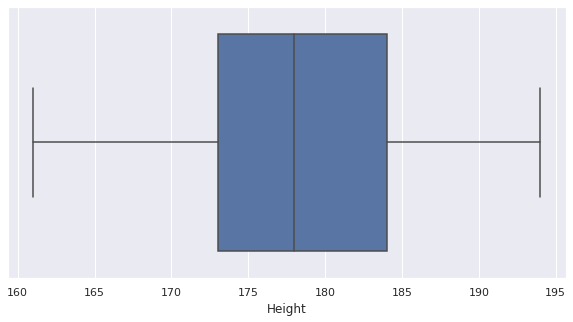

In [137]:
ax = sns.boxplot(x=Males['Height'])

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.839100
Height    28.510205
Weight    29.559538
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.901571
region     0.006999
notes     97.906718
dtype: float64

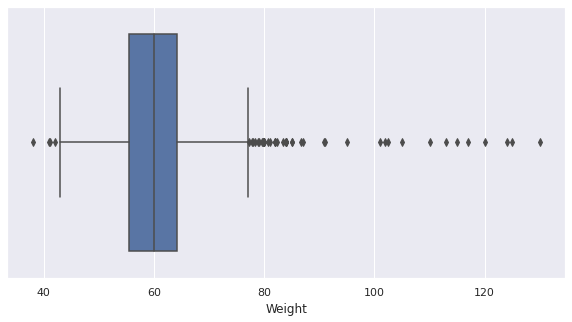

In [138]:
sports_weight_females = Females.groupby(['Sport', 'region'])['Weight'].mean()
sports_weight_males = Males.groupby(['Sport', 'region'])['Weight'].mean()


dropped_null_values_weight_females = sports_weight_females.dropna(how='all')
dropped_null_values_weight_females.values

dropped_null_values_weight_males = sports_weight_males.dropna(how='all')
dropped_null_values_weight_males


ay = sns.boxplot(x=dropped_null_values_weight_females)

Males.isna().sum()/len(Males) *100

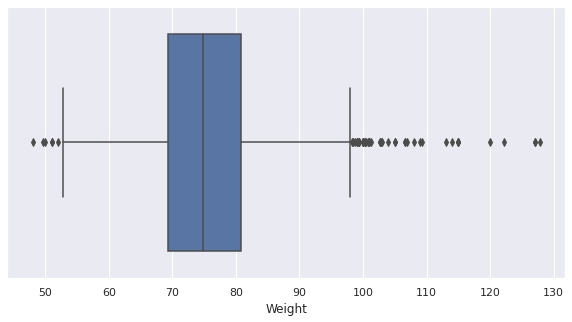

In [139]:
ay = sns.boxplot(x=dropped_null_values_weight_males)

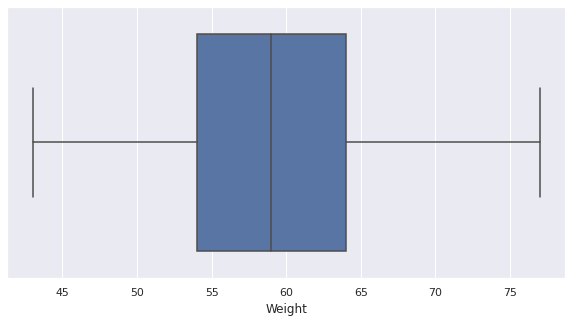

In [140]:
#Removed outliers in female weight

Q1 = np.percentile(dropped_null_values_weight_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Females = Females[~(Females['Weight'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Weight'] <= (Q1-1.5*IQR))]


#Removed outliers in male weight

Q1 = np.percentile(dropped_null_values_weight_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Weight'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Weight'] <= (Q1-1.5*IQR))]

ay = sns.boxplot(x=Females['Weight'])

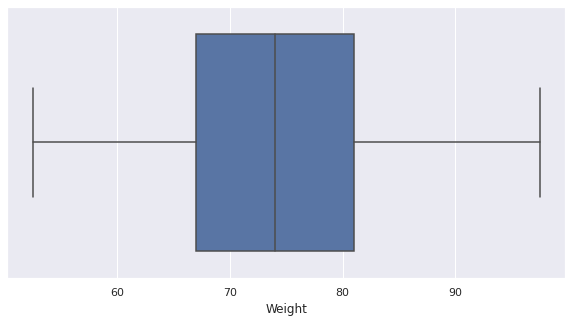

In [141]:
ay = sns.boxplot(x=Males['Weight'])

In [142]:
Males['Weight']
Males.isna().sum()/len(Males) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.988901
Height    29.430892
Weight    30.621089
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.019364
region     0.007250
notes     97.881739
dtype: float64

In [143]:

Males['Height'] = Males['Height'].fillna(Males.groupby(['region', 'Sport'])['Height'].transform('mean'))
Males.isna().sum()/len(Males)  *100


ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.988901
Height     1.645863
Weight    30.621089
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.019364
region     0.007250
notes     97.881739
dtype: float64

In [144]:
Males['Weight'] = Males['Weight'].fillna(Males.groupby(['region', 'Sport'])['Weight'].transform('mean'))
Males.isna().sum()/len(Males)  *100


ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.988901
Height     1.645863
Weight     1.807605
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.019364
region     0.007250
notes     97.881739
dtype: float64

In [145]:
Females['Height'] = Females['Height'].fillna(Females.groupby(['region', 'Sport'])['Height'].transform('mean'))
Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.633037
Height     1.036713
Weight    11.723421
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.599168
region     0.010704
notes     98.715577
dtype: float64

In [146]:
Females['Weight'] = Females['Weight'].fillna(Females.groupby(['region', 'Sport'])['Weight'].transform('mean'))
Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.633037
Height     1.036713
Weight     1.099405
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.599168
region     0.010704
notes     98.715577
dtype: float64

In [147]:
frames = [Females, Males]
Olympics_data_cleaned = pd.concat(frames)
Olympics_data_cleaned.isna().sum()/len(Olympics_data_cleaned) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.824730
Height     1.483059
Weight     1.618328
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.907061
region     0.008173
notes     98.104595
dtype: float64


#Question 1 Does hosting help the performance

*   make a new column called Host_Country where it has the hosting country of each record
*   By applying the method host_country it takes the city the Olympics was hosted in and assigns the host country 
*   In a new dataframe medals_hosting_or_not we get the number of Gold - Bronze - Silver - Total Medals for each year for each region and also having the host coutry at that year
*   Adds a new feature where Is_host is added to each record 

*   show  countries and number of medals they have won using: .head() function
*   visualize top 10 countries and average of medals they have won using: scatter plot
*   visualize total medals per years for hosting and non hosting countries using: scatter plot
*   comparing means when hosting and not hosting using: area graph





In [148]:
# Function to map country to city
def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"


# Applying this function
Olympics_data_cleaned ['Host_Country'] = Olympics_data_cleaned['City'].apply(host_country)
Olympics_data_cleaned.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,Brazil
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,Brazil
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,United States of America
13,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,Summer,Sydney,Softball,Softball Women's Softball,NaN,China,NaN,Australia
20,6847,Bai Anqi,F,19.0,164.0,59.0,China,CHN,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN,United Kingdom


In [149]:
#getting the medals when a region is host
medals_hosting_or_not = Olympics_data_cleaned.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

medals_hosting_or_not['Is_Host'] = np.where(medals_hosting_or_not['Host_Country'] == medals_hosting_or_not['region'],1,0)
medals_hosting_or_not['Total Medals'] = medals_hosting_or_not['Bronze'] + medals_hosting_or_not['Silver'] + medals_hosting_or_not['Gold']
medals_hosting_or_not.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
0,1896,Greece,Australia,1,2,0,0,3
1,1896,Greece,Austria,2,2,1,0,5
2,1896,Greece,Denmark,3,1,2,0,6
3,1896,Greece,France,2,5,4,0,11
4,1896,Greece,Germany,2,21,5,0,28


In [150]:
Medals_df = pd.read_excel(get_path('Medals.xlsx'))
Medals_df.head() 

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [151]:
medals_rank_year =  pd.merge(medals_hosting_or_not,Medals_df[['Team/NOC','Rank','Rank by Total']] ,left_on = 'region' , right_on = 'Team/NOC')
medals_rank_year.head()

,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals,Team/NOC,Rank,Rank by Total
0,1896,Greece,Australia,1,2,0,0,3,Australia,6,6
1,1900,France,Australia,3,3,0,0,6,Australia,6,6
2,1904,United States of America,Australia,1,0,3,0,4,Australia,6,6
3,1906,Greece,Australia,3,0,0,0,3,Australia,6,6
4,1908,United Kingdom,Australia,2,15,2,0,19,Australia,6,6


In [152]:
# total_medals = Olympics_data_cleaned.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

# total_medals['Total'] = total_medals['Bronze'] + total_medals['Silver'] + total_medals['Gold']

# total_medals = total_medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

# Medal	Year	Host_Country	region	Bronze	Gold	Silver	Is_Host	Total Medals

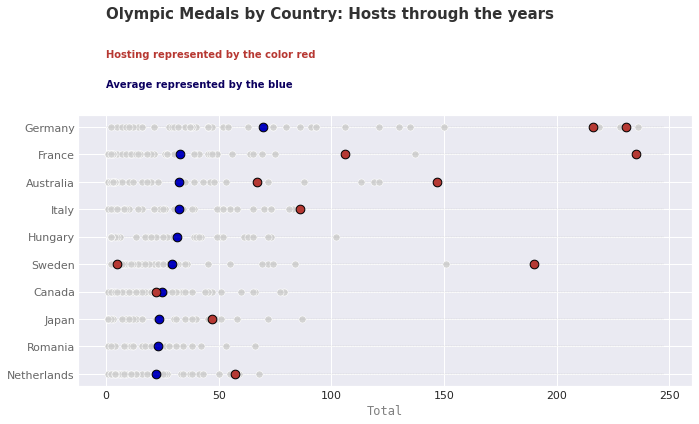

In [153]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(11, 5))


# top 10
top_list_ = medals_rank_year.groupby('Team/NOC')['Total Medals'].mean().sort_values(ascending=False).reset_index()[:10].sort_values(by='Total Medals',ascending=True)

plot = 1
for country in top_list_['Team/NOC']:
    mean = medals_rank_year[medals_rank_year['Team/NOC'] == country].groupby('Team/NOC')['Total Medals'].mean()

    # historic scores
    sns.scatterplot(data=medals_rank_year[medals_rank_year['Team/NOC'] == country], y=plot, x='Total Medals',color='lightgray',s=50,ax=ax)

    # mean score
    sns.scatterplot(data=medals_rank_year[medals_rank_year['Team/NOC'] == country], y=plot, x=mean,color='#0000c0',ec='black',linewidth=1,s=75,ax=ax)
    
    # Hosting score
    sns.scatterplot(data=(medals_rank_year[(medals_rank_year['Team/NOC'] == country) & (medals_rank_year['Is_Host'] == 1)]), y=plot, x='Total Medals',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['Team/NOC'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total",fontfamily='monospace',color='gray')

ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)




ax.text(0,Yend+3.5, 'Olympic Medals by Country: Hosts through the years', fontsize=15,fontweight='bold',color='#323232')
ax.text(0,Yend+2.1, 'Hosting represented by the color red', fontsize=10,fontweight='bold',color='#B73832')
ax.text(0,Yend+1, 'Average represented by the blue', fontsize=10,fontweight='bold',color='#0c005f')


plt.show()



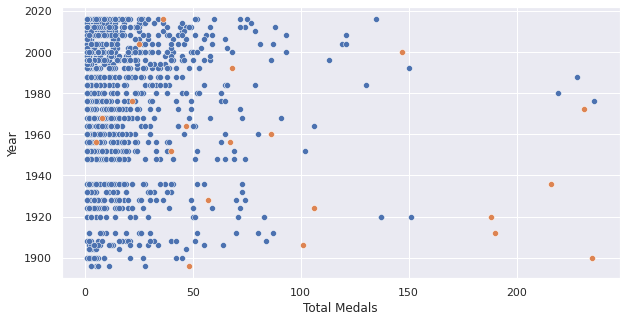

In [154]:
not_host = medals_rank_year[medals_rank_year['Is_Host'] == 0]
host = medals_rank_year[medals_rank_year['Is_Host'] == 1]

sns.scatterplot(y = not_host['Year'] , x = not_host['Total Medals'])
sns.scatterplot( y = host['Year'] , x = host['Total Medals'])


In [155]:
host_list = list(medals_rank_year.query("Is_Host == 1")['Host_Country'].value_counts().index)

medals_rank_year['Total_Medals_NaturalLog'] = np.log(medals_rank_year['Total Medals'])

Not_hosting_samples = medals_rank_year[medals_rank_year['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].count()
hosting_samples = medals_rank_year[medals_rank_year['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].count()

Not_hosting_mean = medals_rank_year[medals_rank_year['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].mean()
hosting_mean = medals_rank_year[medals_rank_year['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].mean()

Not_hosting_std = medals_rank_year[medals_rank_year['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].std()
hosting_std = medals_rank_year[medals_rank_year['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].std()

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


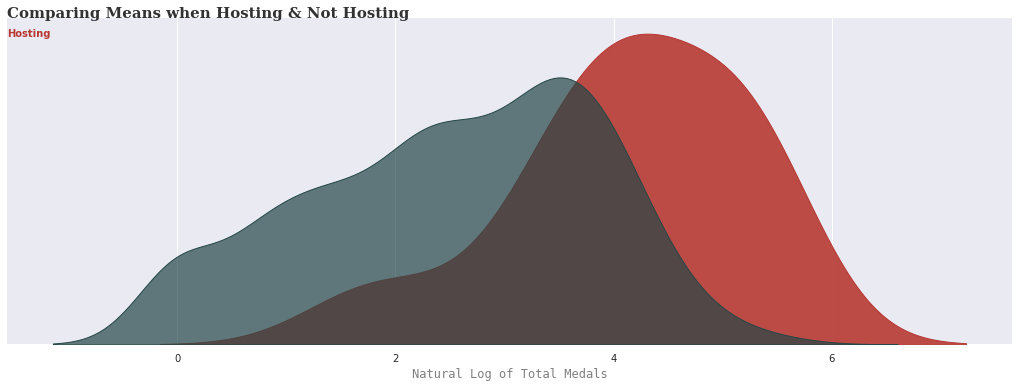

In [156]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
sns.kdeplot(data=medals_rank_year[medals_rank_year['region'].isin(host_list)].query("Is_Host == 1"), x='Total_Medals_NaturalLog',shade=True,color='#B73832',alpha=0.9, ax=ax)
sns.kdeplot(data=medals_rank_year[medals_rank_year['region'].isin(host_list)].query("Is_Host == 0"), x='Total_Medals_NaturalLog', shade=True, color='#244747',alpha=0.7, ax=ax)





for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xlabel("Natural Log of Total Medals",fontfamily='monospace',color='gray')
ax.get_yaxis().set_visible(False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend, 'Comparing Means when Hosting & Not Hosting', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend-0.02, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')



plt.show()

#Question 2 Getting the main characteristics to win a medal
*   comparing number of females and males winning bronze, silver and gold medals using: 
violinplot
*   Games characteristics
    *   in Weightlifting game, determine weight and height characteristics to win medals among males and females using:
        violinplot
    *   in Basketball game, determine height characteristics to win medals using:
        pointplot
    *   in Gymnastics game, determine age characteristics to win medals among males and females using:
         scatterplot
*   Some characteristics
  *   determine age characteristics for athletic participants using:
        Bar chart
  *   determine age characteristics to win medals using:
        violinplot
  *   determine reogon characteristics to win medals using:
       Bar chart
  *   determine variation of females and males Athletes over time using: linear graphs
  *   determine variation of Sports for femlaes and males participants over time using: linear praphs
    *   determine variation of femlaes and males to win medals per edition of the Game: Bar chart
  *   determine season characteristics to win medals using:  Python turtle and scatterplot



In [157]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

In [158]:
tmp_medal = Olympics_data_cleaned[Olympics_data_cleaned.Medal.notnull()]
tmp_medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,United States of America
33,7597,Bao Yingying,F,24.0,172.0,67.0,China,CHN,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Team",Silver,China,NaN,China
53,17282,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,China,NaN,United States of America
63,17289,Cai Tongtong,F,18.0,168.0,48.0,China,CHN,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Silver,China,NaN,China
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN,China


In [159]:
total_medals =  Olympics_data_cleaned.groupby(['Sex','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

total_medals['Total'] = total_medals['Bronze'] + total_medals['Silver'] + total_medals['Gold']

total_medals = total_medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)
total_medals

Medal,Bronze,Silver,Gold,Total
Sex,,,,
M,8385,8304,8378,25067
F,3167,3152,3099,9418


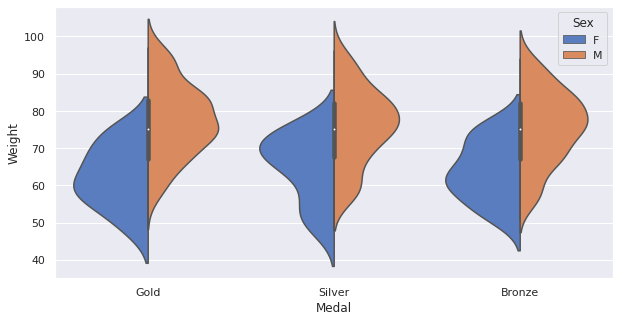

In [160]:
Weightlifting = tmp_medal.loc[tmp_medal['Sport'] == 'Weightlifting']

ax = sns.violinplot(x="Medal", y="Weight", hue="Sex", data=Weightlifting, palette="muted", split=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Heightfor Basketball athletics')

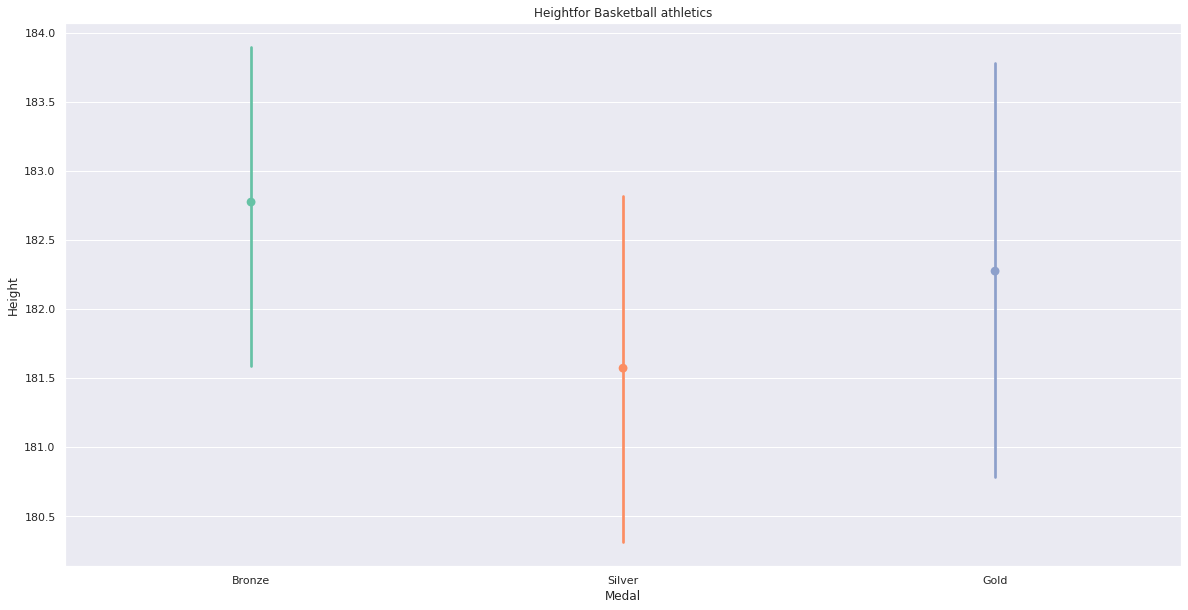

In [161]:
Basketball = tmp_medal.loc[tmp_medal['Sport'] == 'Basketball']

plt.figure(figsize=(20, 10))
sns.pointplot('Medal', 'Height', data=Basketball, palette='Set2')
plt.title('Heightfor Basketball athletics')

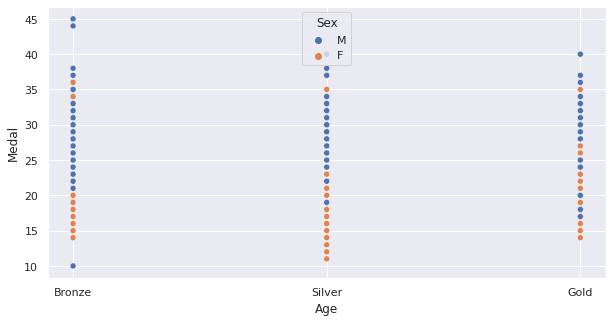

In [162]:
Gymnastics = tmp_medal.loc[tmp_medal['Sport'] == 'Gymnastics']

sns.scatterplot(x=Gymnastics.Medal, y=Gymnastics.Age, hue='Sex', data=tmp_medal)
plt.xlabel("Age")
plt.ylabel("Medal");

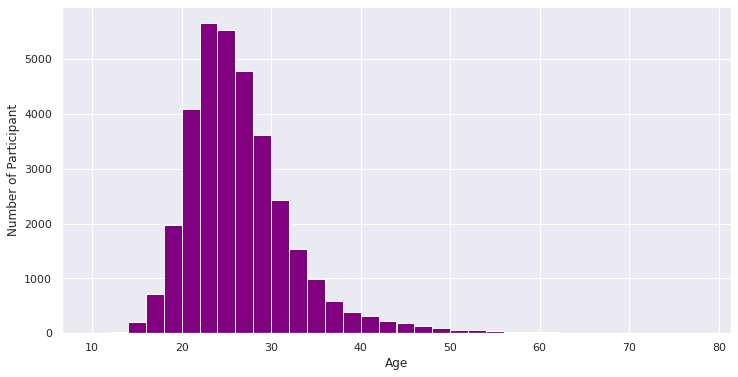

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure

plt.figure(figsize=(12, 6))
# plt.title(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Participant')

plt.hist(tmp_medal.Age, bins=np.arange(10,80,2), color='purple');

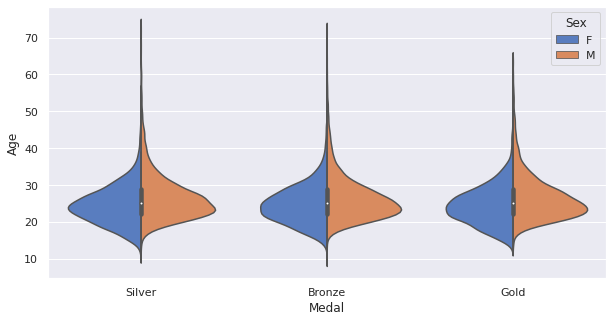

In [164]:
var = sns.violinplot(x="Medal", y="Age", hue="Sex", data=Olympics_data_cleaned, palette="muted", split=True)

In [165]:
medals_graphs = df.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals_graphs['Total'] = medals_graphs['Bronze'] + medals_graphs['Silver'] + medals_graphs['Gold']

medals_graphs = medals_graphs[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals_graphs.iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games [Top 15]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')\

#.background_gradient(subset=['Total'], cmap='BuGn')

Medal,Bronze,Silver,Gold,Total
region,,,,
USA,1358,1641,2638,5637
Russia,1178,1170,1599,3947
Germany,1260,1195,1301,3756
UK,651,739,678,2068
France,666,610,501,1777
Italy,531,531,575,1637
Sweden,535,522,479,1536
Canada,451,438,463,1352
Australia,522,459,368,1349


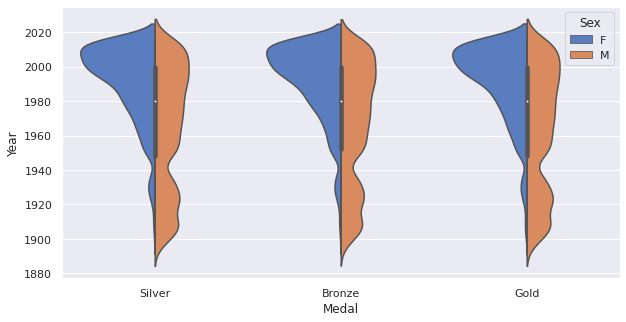

In [166]:
var = sns.violinplot(x="Medal", y="Year", hue="Sex", data=Olympics_data_cleaned, palette="muted", split=True)

Text(0.5, 1.0, 'Variation of Female Athletes over time')

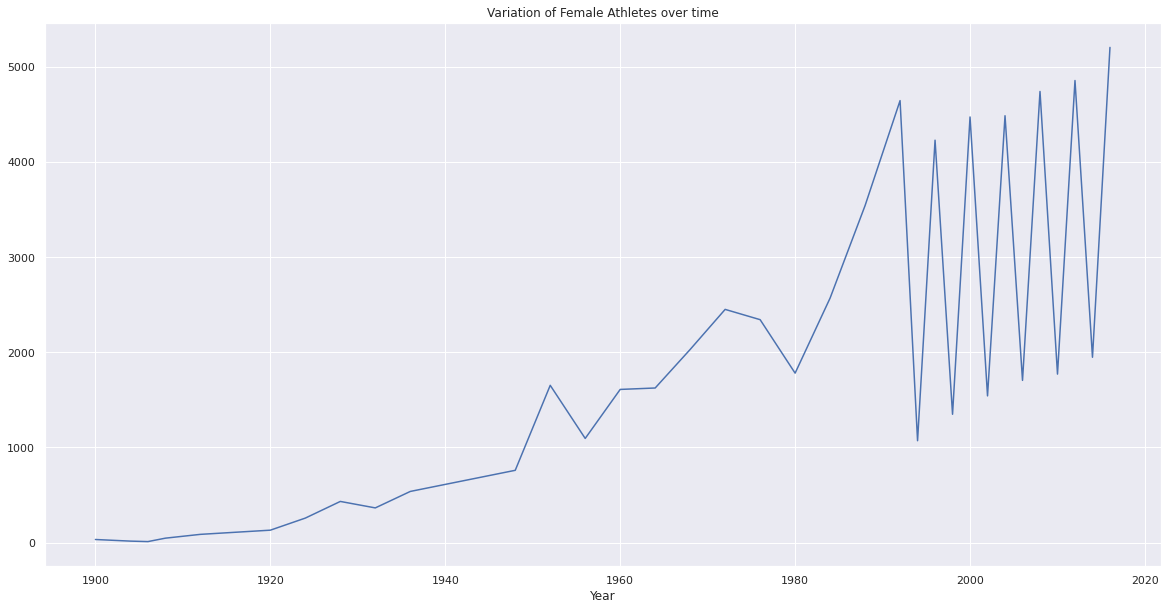

In [167]:
#females
part = Females.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

Text(0.5, 1.0, 'Variation of Male Athletes over time')

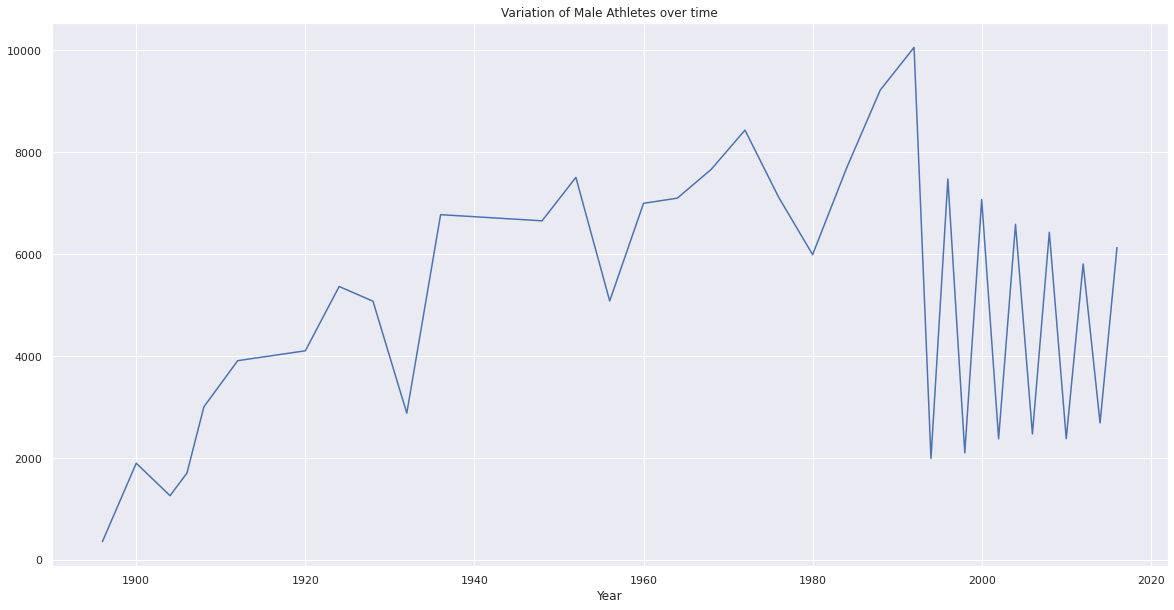

In [168]:
#males
part = Males.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Sports for Males over time')

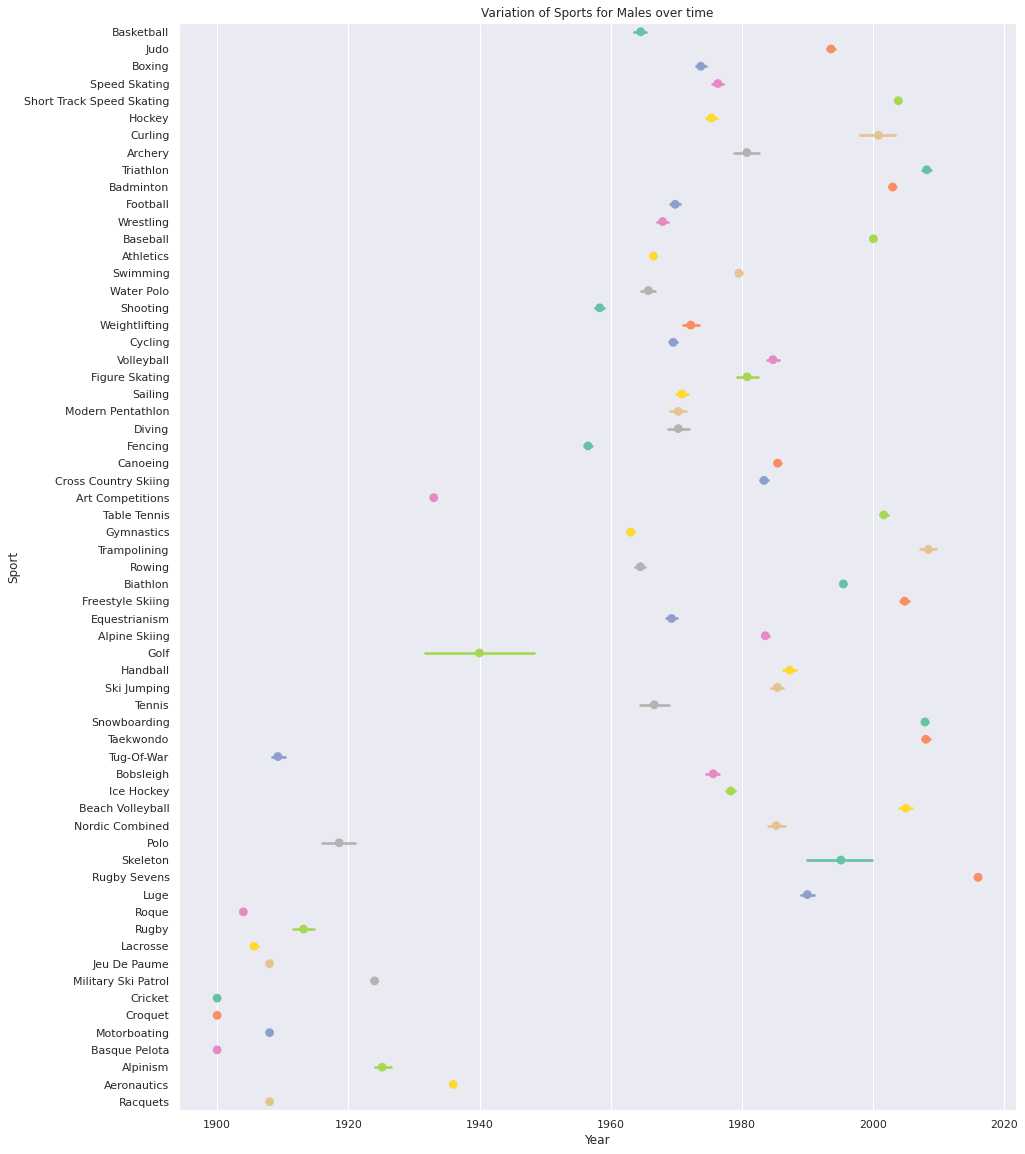

In [169]:
plt.figure(figsize=(15, 20))
sns.pointplot('Year', 'Sport', data=Males, palette='Set2')
plt.title('Variation of Sports for Males over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Sports for Females over time')

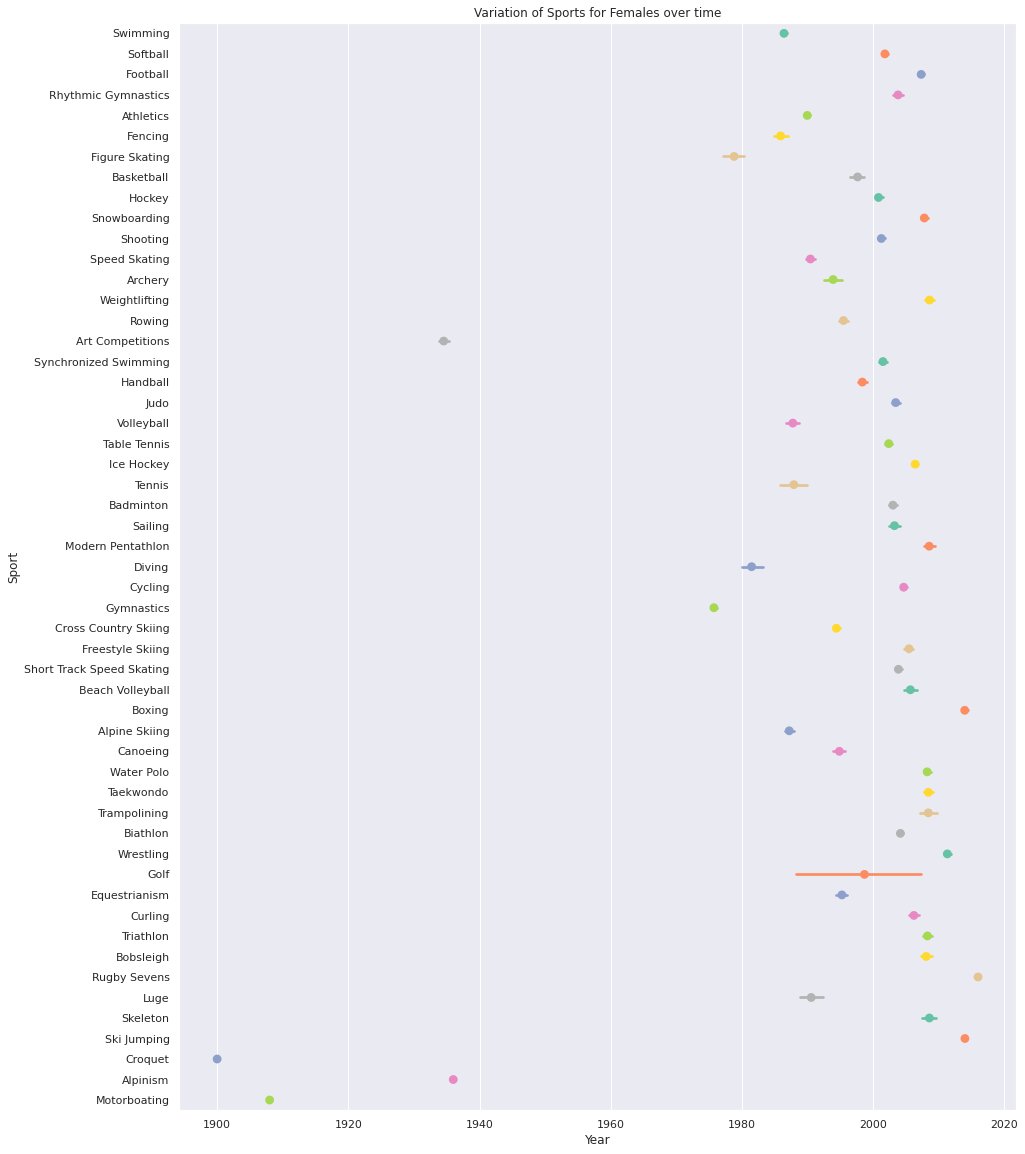

In [170]:
plt.figure(figsize=(15, 20))
sns.pointplot('Year', 'Sport', data=Females, palette='Set2')
plt.title('Variation of Sports for Females over time')

Text(0.5, 1.0, 'Women medals per edition of the Games')

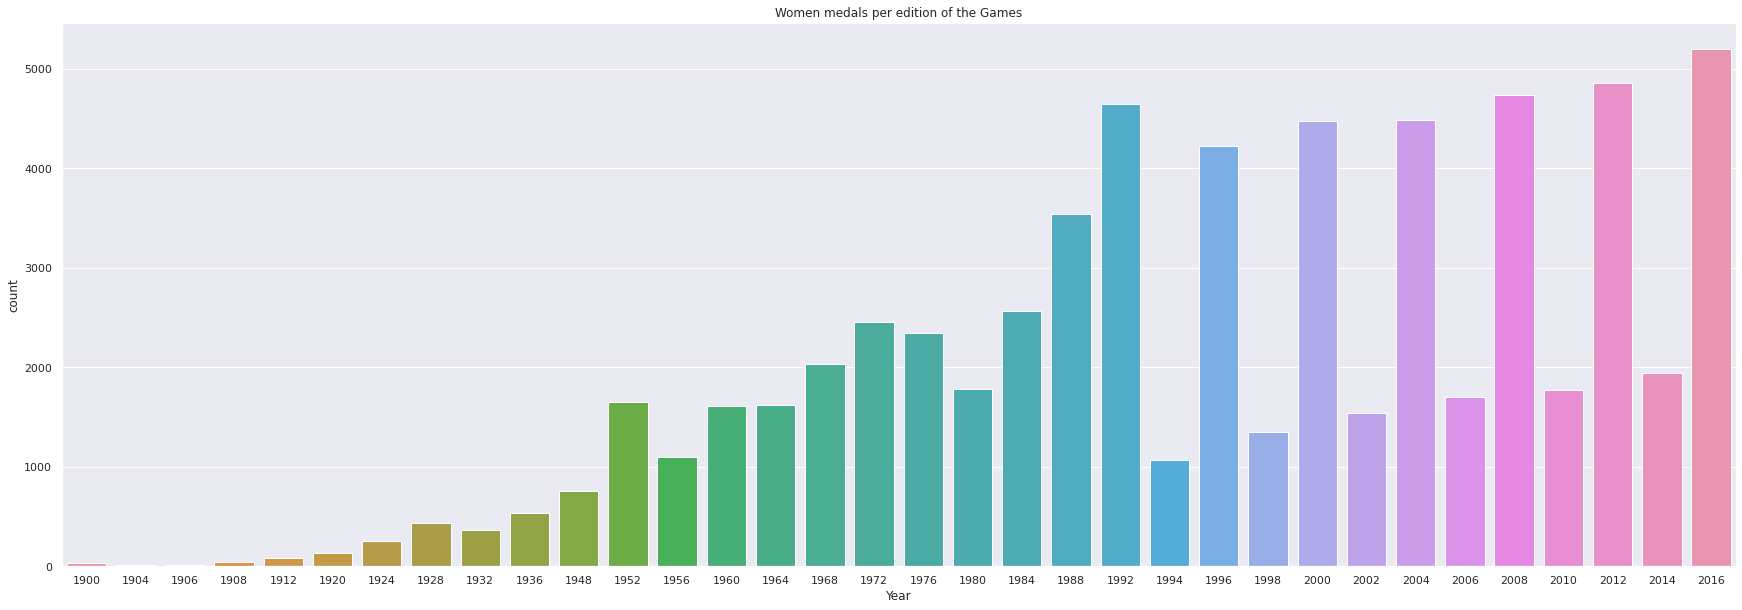

In [171]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=Females)
plt.title('Women medals per edition of the Games')

Text(0.5, 1.0, 'Mel medals per edition of the Games')

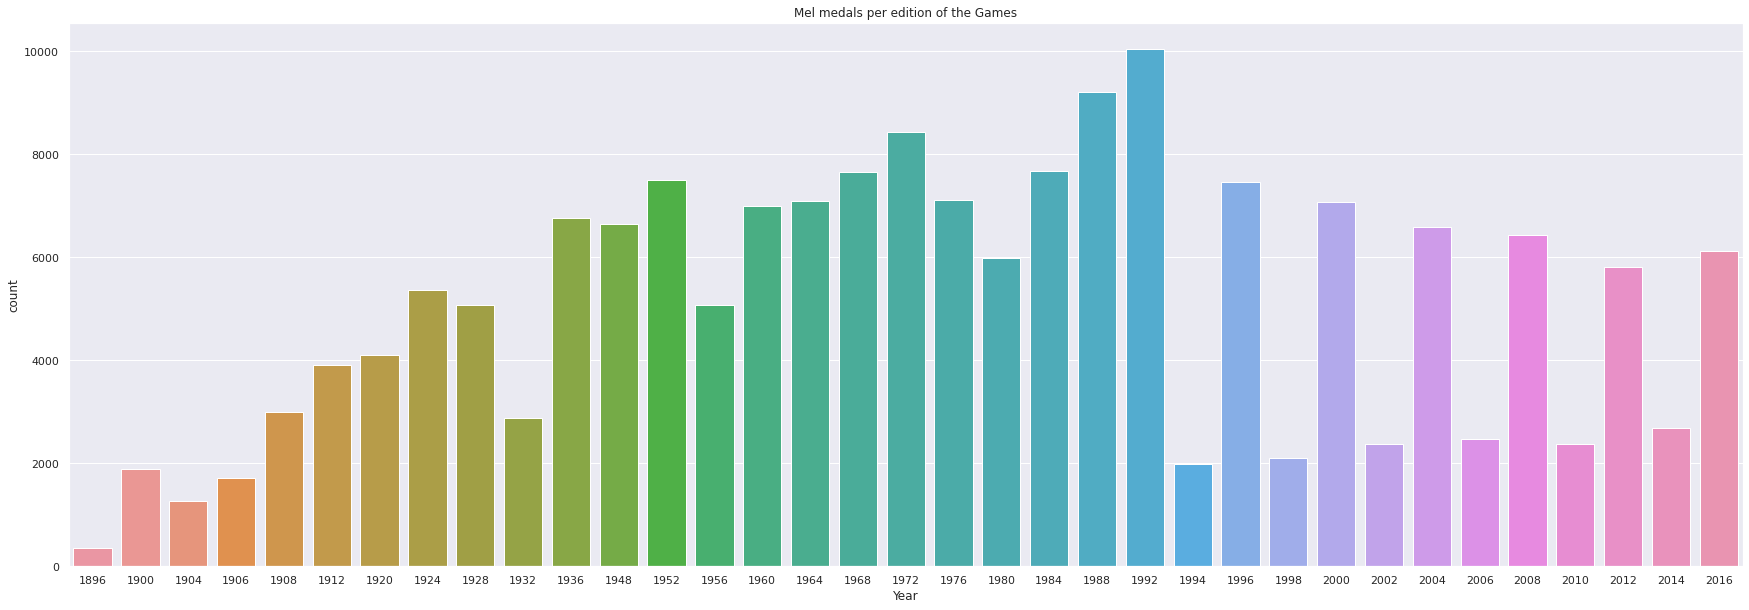

In [172]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=Males)
plt.title('Mel medals per edition of the Games')

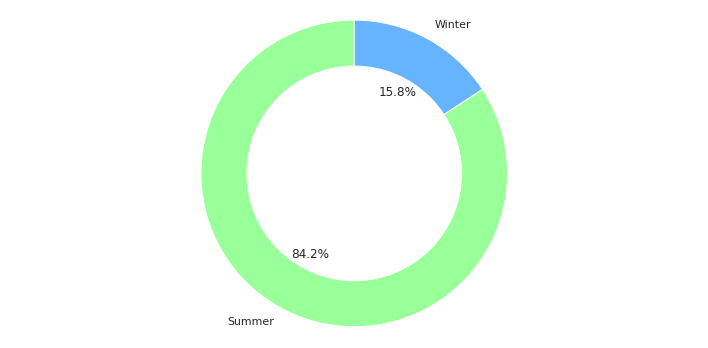

In [173]:
Diff_seasons = tmp_medal.Season.value_counts()
Diff_seasons

fig1, ax1 = plt.subplots()

colors = ['#99ff99','#66b3ff']

ax1.pie(Diff_seasons, colors = colors, labels=Diff_seasons.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [174]:
summer_data =Olympics_data_cleaned[Olympics_data_cleaned['Season']=='Summer']
summer_data = summer_data[summer_data.Medal.notnull()]
# summer_data

winter_data =Olympics_data_cleaned[Olympics_data_cleaned['Season']=='Winter']
winter_data = winter_data[winter_data.Medal.notnull()]

summer_data = summer_data.groupby(['Year'])
winter_data = winter_data.groupby(['Year'])

In [175]:
#summer
plt.sca

<function matplotlib.pyplot.sca>

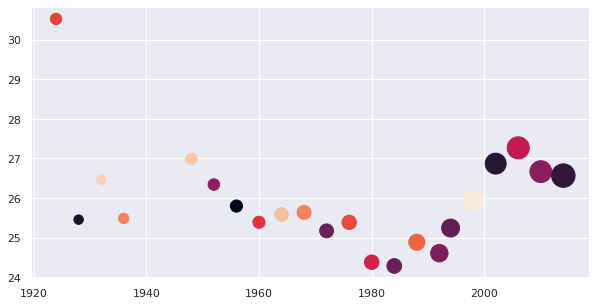

In [176]:
#winter
plt.scatter(winter_data .mean().index,winter_data .Age.mean().values,s = winter_data .Medal.count().values, c= np.random.randn(len(winter_data )))

#Question 3 Checking the performance before and after getting the regions' first gold medal


*   Get Countries with gold medals 
*   Get the first gold medal the country got by sorting the gold medals won and grouping it by the region and only taking the first medal by that region
*   Get the number of medals before receiving the first gold medal: lineplot
*   Get the number of medals after receiving the first gold medal: lineplot
*   determine number of medals won by Japan - Egypt - Armenia before and after winning gold medal using: lineplot



In [177]:

first_gold = medals_rank_year[medals_rank_year['Gold'] > 0]
first_gold = first_gold.sort_values(by = ['Year']).groupby('region')['Gold','Year','region'].first()
first_gold.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Gold,Year,region
region,,,
Argentina,5,1924,Argentina
Armenia,1,1996,Armenia
Australia,2,1896,Australia
Austria,2,1896,Austria
Azerbaijan,2,2000,Azerbaijan


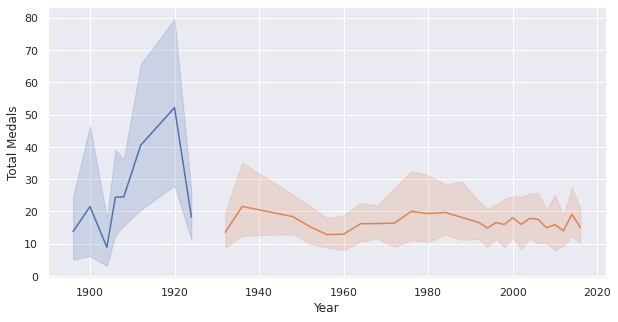

In [178]:
total = [host, not_host]
total_m = pd.concat(total)

first_japan = first_gold[first_gold.region == 'Japan']['Year'].values[0]
before_gold_japan = total_m[total_m['Year'] < first_japan] 
after_gold_japan = total_m[total_m['Year'] > first_japan] 

sns.lineplot(x="Year", y="Total Medals",data=before_gold_japan)
sns.lineplot(x="Year", y="Total Medals",data=after_gold_japan)




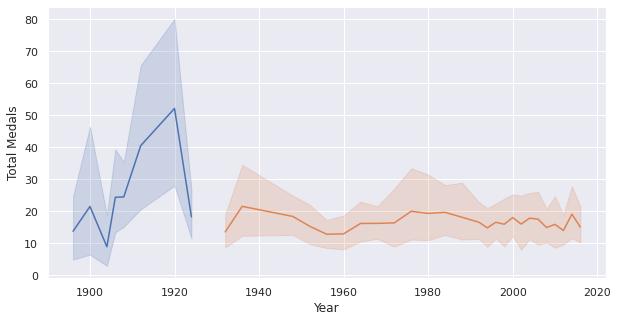

In [179]:
first_egypt = first_gold[first_gold.region == 'Egypt']['Year'].values[0]


before_gold_Egypt = total_m[total_m['Year'] < first_egypt] 
after_gold_Egypt = total_m[total_m['Year'] > first_egypt] 

sns.lineplot(x="Year", y="Total Medals",data=before_gold_Egypt)
sns.lineplot(x="Year", y="Total Medals",data=after_gold_Egypt)

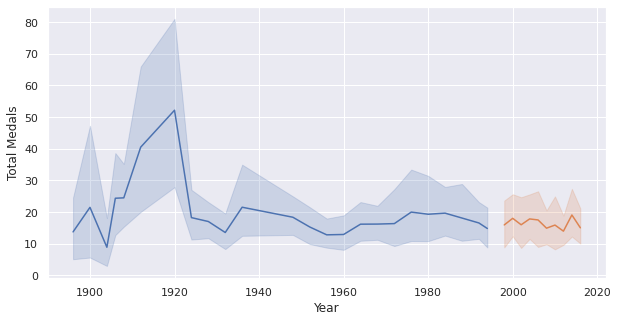

In [180]:
first_gold_Armenia = first_gold[first_gold.region == 'Armenia']['Year'].values[0]

before_gold_Armenia = total_m[total_m['Year'] < first_gold_Armenia] 
after_gold_Armenia = total_m[total_m['Year'] > first_gold_Armenia] 

sns.lineplot(x="Year", y="Total Medals",data=before_gold_Armenia)
sns.lineplot(x="Year", y="Total Medals",data=after_gold_Armenia)

